In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  

In [2]:
from sklearn.datasets import make_circles 
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(43)
X,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=43,test_size=0.2)

In [4]:
X.shape

(500, 2)

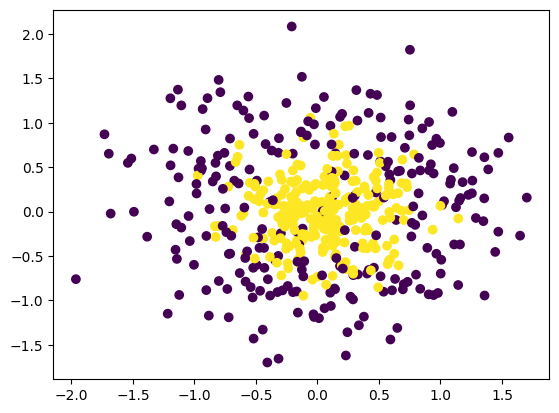

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.tree import DecisionTreeClassifier 
clf=DecisionTreeClassifier()

In [7]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
from sklearn.metrics import accuracy_score ,r2_score
y_pre=clf.predict(X_test)

In [9]:
accuracy_score(y_pre,y_test)

0.77

In [10]:
r2_score(y_pre,y_test)

0.07407407407407385

In [11]:
from mlxtend.plotting import plot_decision_regions 


<Axes: >

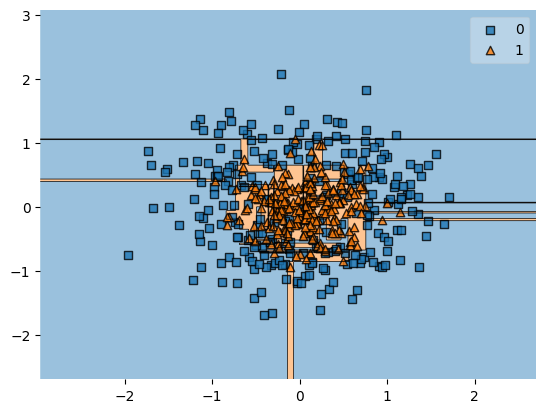

In [16]:
plot_decision_regions( X, y,clf)

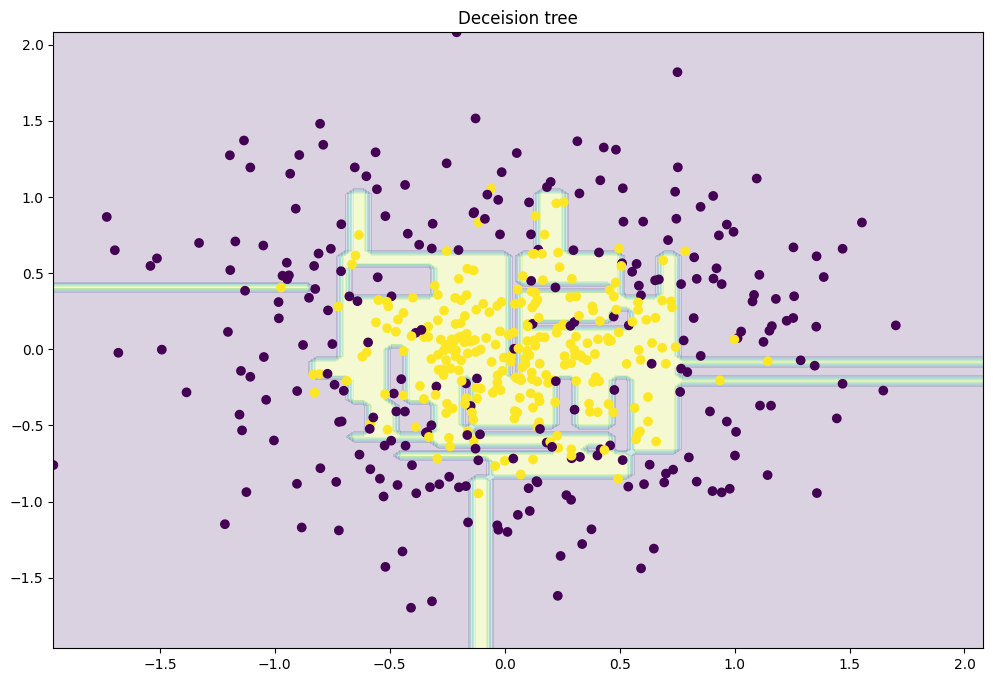

In [14]:
plt.figure(figsize=(12,8))
x_rang = np.linspace(X.min(),X.max(),100)
xx1,xx2 = np.meshgrid(x_rang,x_rang)
y_hat =clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat=y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=1)
plt.title("Deceision tree")
plt.show()

# low baise High varinace

<h1>Overfiting on data point</h1>

In [15]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=500,random_state=42)

In [16]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

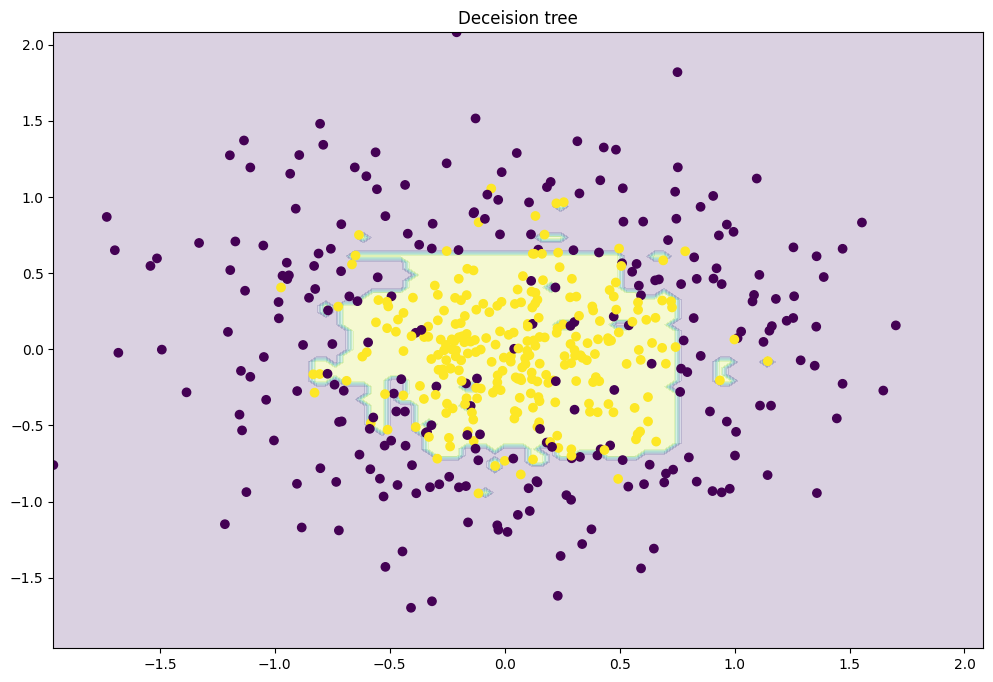

In [17]:
plt.figure(figsize=(12,8))
x_rang = np.linspace(X.min(),X.max(),100)
xx1,xx2 = np.meshgrid(x_rang,x_rang)
y_hat =clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat=y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=1)
plt.title("Random tree")
plt.show()

In [18]:
y_ha=clf.predict(X_test)
accuracy_score(y_test,y_ha)

0.8

In [19]:
# aaccuracy score

<Axes: >

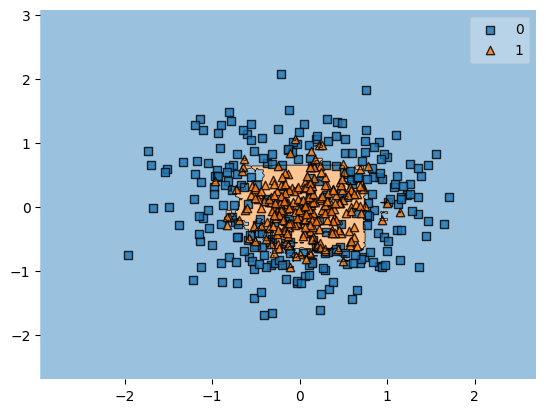

In [20]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X,y,clf)

# Regression point for the give Random forest 

In [22]:
n_train =150 
n_test =1000 
noies =0.1 

def f(x):
    x=x.ravel()
    return np.exp(-x **2)+ 1.5 * np.exp(-(x-2)**2)

In [24]:
def generate(n_sample,noise): 
    X=np.random.rand(n_sample) *10 -5 
    X=np.sort(X).ravel() 
    y=np.exp(-X ** 2) + 1.5 *np.exp(-(X-2)**2)+ np.random.normal(0.0,noies,n_sample)
    X=X.reshape((n_sample,1))
    return X,y  

X_train,y_train =generate(n_sample=n_train,noise=noies) 
X_test,y_test =generate(n_sample=n_test,noise=noies)

(-5.0, 5.0)

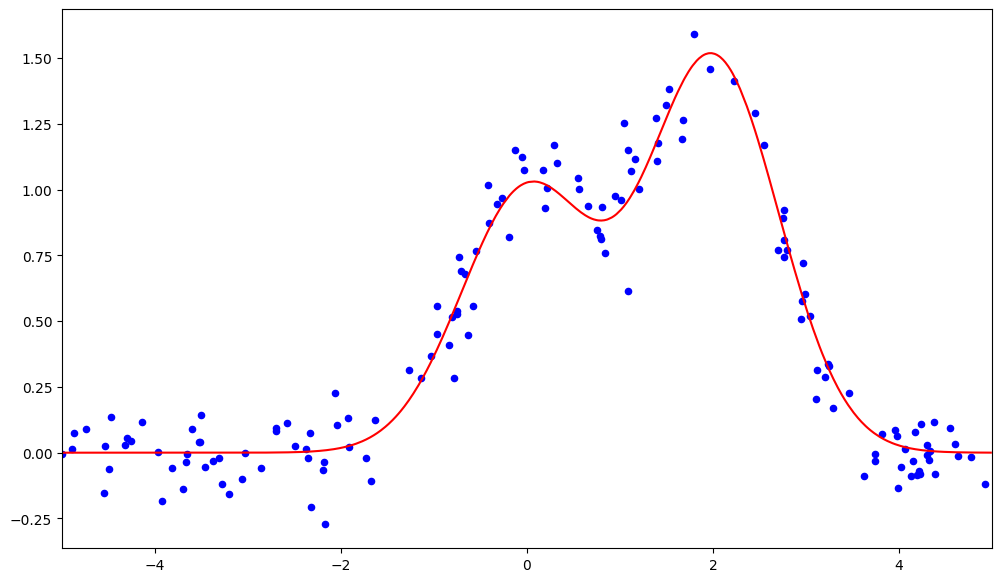

In [25]:
plt.figure(figsize=(12,7))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s=20)
plt.xlim([-5,5])

In [26]:
from sklearn.tree import DecisionTreeRegressor 

In [27]:
dtree =DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

(-5.0, 5.0)

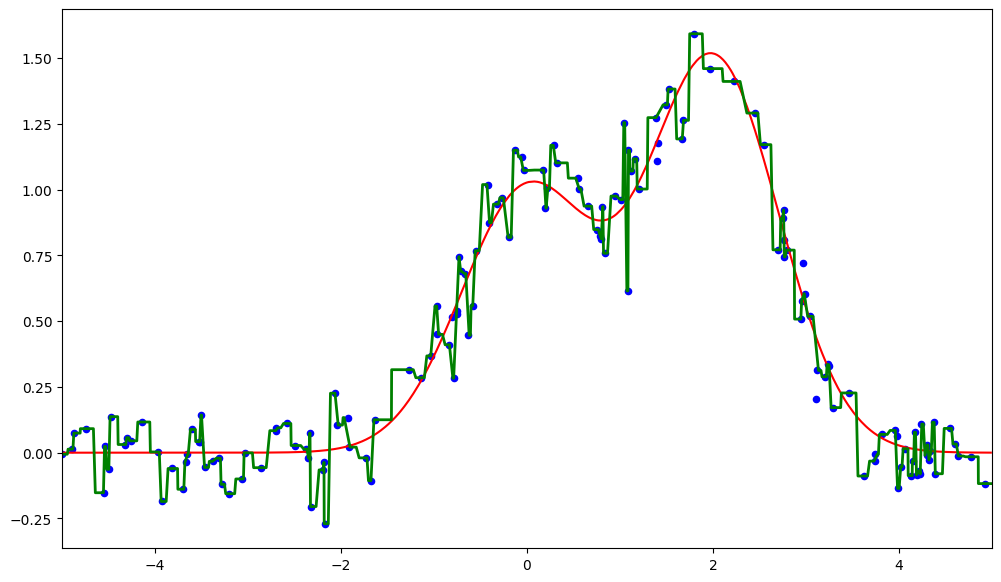

In [28]:
d_pre=dtree.predict(X_test)
plt.figure(figsize=(12,7))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s=20)
plt.plot(X_test,d_pre,"g",lw=2)
plt.xlim([-5,5])


In [29]:
from sklearn.ensemble import RandomForestRegressor 

In [43]:
rdr =RandomForestRegressor(n_estimators=1000) 

In [44]:
rdr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [32]:
from mlxtend.plotting import plot_linear_regression

In [41]:
# plot_linear_regression(X,y_train.astype(int),rdr)

(-5.0, 5.0)

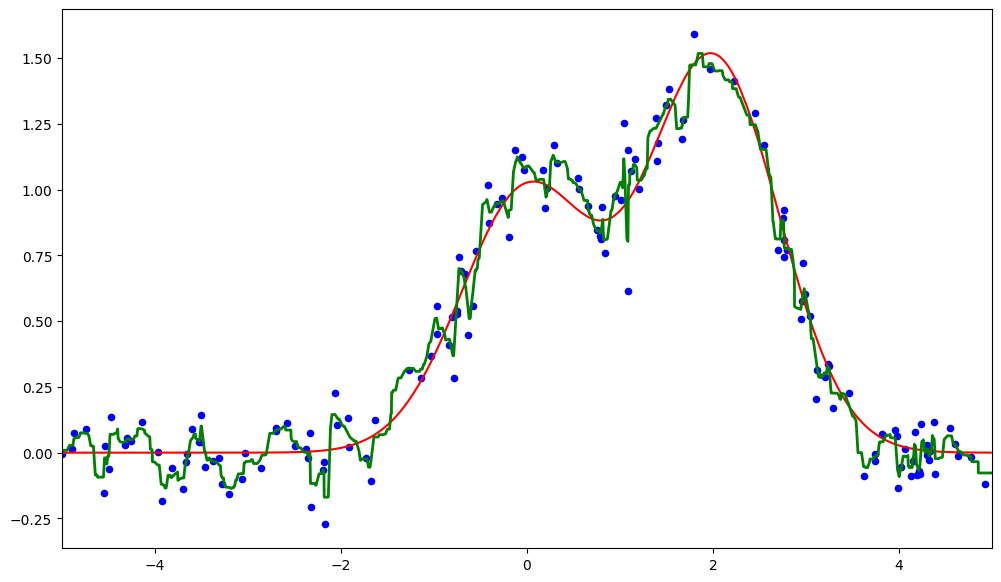

In [45]:
r_pre=rdr.predict(X_test)
plt.figure(figsize=(12,7))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s=20)
plt.plot(X_test,r_pre,"g",lw=2)
plt.xlim([-5,5])


In [46]:
from sklearn.metrics import r2_score 
r2_score(y_test,r_pre)

0.936367014966834